In [1]:
dane <- matrix(c(28, 11, 49, 43), 2, dimnames = list(c("Ekstrawertyk","Introwertyk"), c("Niebieski","Czerwony"))) # tutaj popełniłem błąd
r_sum <- rowSums(dane) 
c_sum <- colSums(dane) 
E <- outer(r_sum, c_sum)/sum(r_sum)
print("Wartości oczekiwane: ")
round(E,3)
alfa <- 0.01

df <- (length(r_sum) - 1) * (length(c_sum) - 1)
print("Zbiór krytyczny: ")
noquote(paste('(', round(qchisq(1-alfa, df),3), ",inf)", sep = ""))
print("Statystyka: ")

round(chisq.test(dane)$statistic[[1]],3) # tutaj popełniłem błąd
print("Decyzja: ", quote = FALSE)
if (alfa >= chisq.test(dane)$p.value[[1]])
{
    noquote("Odrzucamy H0 na rzecz H1")
}else
{
    noquote("Brak podstaw do odrzucenia H0")
}

[1] "Wartosci oczekiwane: "


,Niebieski,Czerwony
Ekstrawertyk,22.924,54.076
Introwertyk,16.076,37.924


[1] "Zbiór krytyczny: "


[1] (6.635,inf)

[1] "Statystyka: "


[1] 3.156

[1] Decyzja: 


[1] Brak podstaw do odrzucenia H0

Dane w R powinny być wpisywane kolumnami, a nie wierszami. To jest chyba standardowa metoda wczytywania z ciągu liczb, bo w MATLAB-ie i bibliotekach do Pythona i C++ tak też się robi. Bezmyślnie próbowałem wczytać wierszami, a przecież wystarczyło tylko sprawdzić czy dane się dobrze wpisały o tak:

In [2]:
dane

,Niebieski,Czerwony
Ekstrawertyk,28,49
Introwertyk,11,43


Mogę łatwo zobrazować kolejność wczytywania elementów za pomocą polecenia:

In [3]:
matrix(1:9, 3) #3d
matrix(1:4, 2) #2d

1,4,7
2,5,8
3,6,9


1,3
2,4


Przez moją błędną fromę zapisu element 2. jest zamieniony z elementem 3., co widać ładnie na zrzucie ekranu:
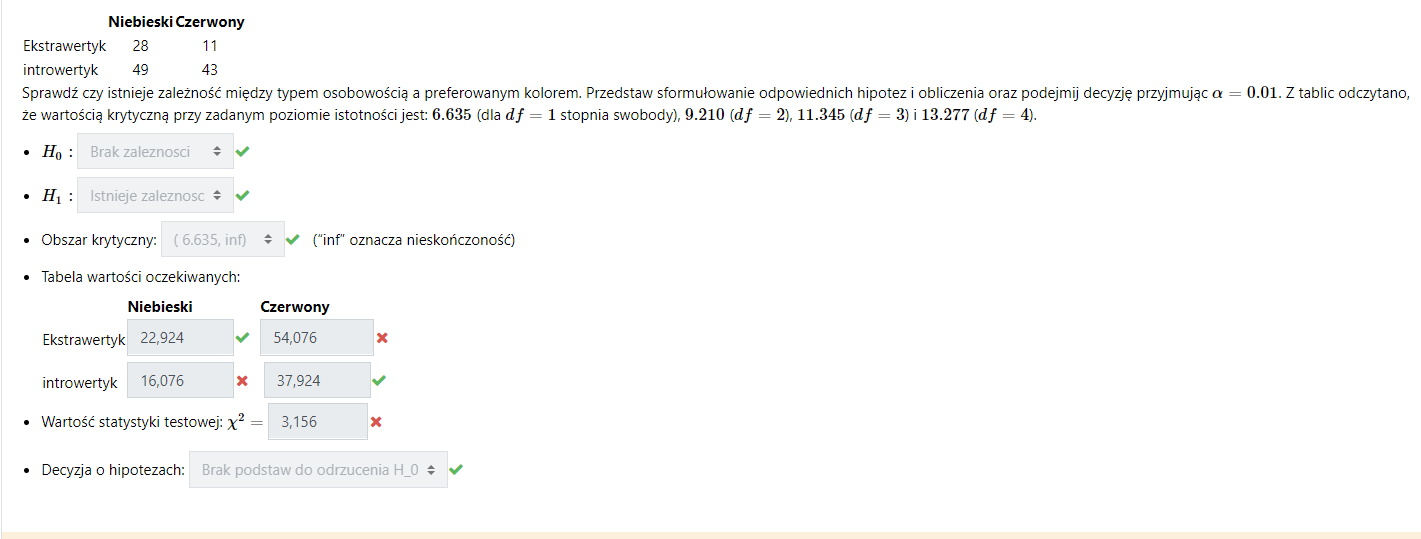

In [4]:
matrix(c(28, 11, 49, 43), 2, dimnames = list(c("Ekstrawertyk","Introwertyk"), c("Niebieski","Czerwony"))) # błędne
print("Po poprawie:")
matrix(c(28, 49, 11, 43), 2, dimnames = list(c("Ekstrawertyk","Introwertyk"), c("Niebieski","Czerwony"))) # poprawione

,Niebieski,Czerwony
Ekstrawertyk,28,49
Introwertyk,11,43


[1] "Po poprawie:"


,Niebieski,Czerwony
Ekstrawertyk,28,11
Introwertyk,49,43


In [5]:
dane <- matrix(c(28, 49, 11, 43), 2, dimnames = list(c("Ekstrawertyk","Introwertyk"), c("Niebieski","Czerwony"))) # poprawioner_sum <- rowSums(dane) 
r_sum <- rowSums(dane) 
c_sum <- colSums(dane)
E <- outer(r_sum, c_sum)/sum(r_sum)
print("Wartości oczekiwane po poprawce: ")
round(E,3)

[1] "Wartosci oczekiwane po poprawce: "


,Niebieski,Czerwony
Ekstrawertyk,22.924,16.076
Introwertyk,54.076,37.924


Drugi błąd wynika z tego, że myślałem, że test `chisq.test` automatycznie sprawdza czy n >= 40 i włącza/wyłącza poprawkę Yatesena. Tutaj to rzeczywiście moja niewiedza z R i słusznie odjęte punkty. Dla formalności podam poprawny kod:

In [6]:
round(chisq.test(dane, correct = FALSE)$statistic[[1]],3) # poprawione

[1] 3.883